# 1.Setting up the Enviroment

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


# 2.Upload data


In [54]:
responses_df = pd.read_csv("../raw/Experiment_1/A1/n_back_responses.csv")
responses_df.head() 

,ExperimentName,Start_time_unix,Subject,Session,DataFile.Basename,Display.RefreshRate,ExperimentVersion,Group,InstructionNewMusic.DEVICE,InstructionNoMusic.DEVICE,...,TrialList8.Cycle,TrialList8.Sample,TSO,TSTh,TSvO,TSvTh,TSxO,TSxTh,TTO,TTTh
0,Experiment_1,1624262243,1,1,Experiment_1-1-1,75.03,1.0.0.251,1,Chronos,Chronos,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Experiment_1,1624262243,1,1,Experiment_1-1-1,75.03,1.0.0.251,1,Chronos,Chronos,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Experiment_1,1624262243,1,1,Experiment_1-1-1,75.03,1.0.0.251,1,Chronos,Chronos,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Experiment_1,1624262243,1,1,Experiment_1-1-1,75.03,1.0.0.251,1,Chronos,Chronos,...,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Experiment_1,1624262243,1,1,Experiment_1-1-1,75.03,1.0.0.251,1,Chronos,Chronos,...,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
eda_df = pd.read_csv('../raw/Experiment_1/A1/Left_EDA.csv')
temp_df = pd.read_csv('../raw/Experiment_1/A1/Left_TEMP.csv')
hr_df = pd.read_csv('../raw/Experiment_1/A1/Left_HR.csv')
bvp_df = pd.read_csv('../raw/Experiment_1/A1/Left_BVP.csv')



In [56]:
temp_df['start_time_unix'] = temp_df['start_time_unix'].astype('long')
temp_df.head()

,TEMP,start_time_unix,sampling_rate
0,32.79,1624262177,4.0
1,32.79,1624262177,4.0
2,32.79,1624262177,4.0
3,32.79,1624262177,4.0
4,32.79,1624262177,4.0


In [61]:
eda_df['start_time_unix'] = eda_df['start_time_unix'].astype('long')
eda_df.head()

,EDA,start_time_unix,sampling_rate
0,0.000000,1624262177,4.0
1,0.308819,1624262177,4.0
2,0.388267,1624262177,4.0
3,0.389548,1624262177,4.0
4,0.392111,1624262177,4.0


<Axes: title={'center': 'DataFrame Plot'}>

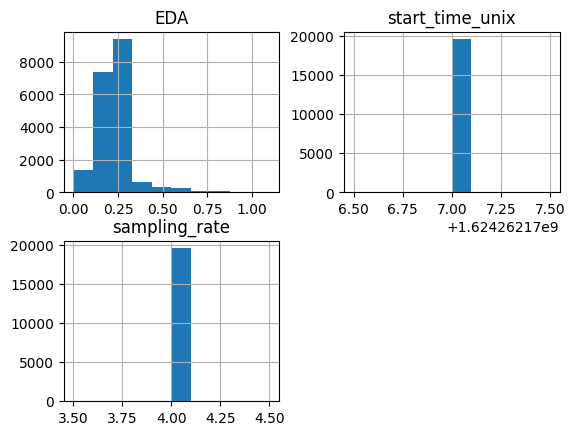

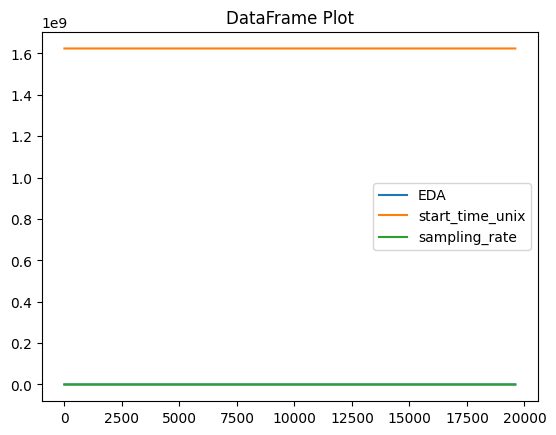

In [ ]:
eda_df.hist()
eda_df.plot(title="DataFrame Plot")

# 3. Preprocessing


### 3.1.Merge DataFrames


In [64]:
combined_df = pd.merge(temp_df, eda_df, on='start_time_unix', how='inner')

MemoryError: Unable to allocate 2.86 GiB for an array with shape (384199200, 1) and data type float64